In [1]:
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree #https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import numpy as np
from sklearn import metrics

In [2]:
df = pd.read_csv('glass.csv', delimiter=',')
df.head()

,Id,refractive index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

[Text(0.3333333333333333, 0.9166666666666666, 'Id <= 69.5\ngini = 0.737\nsamples = 164\nvalue = [54, 58, 13, 10, 7, 22]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 54\nvalue = [54, 0, 0, 0, 0, 0]'),
 Text(0.5, 0.75, 'Id <= 146.5\ngini = 0.656\nsamples = 110\nvalue = [0, 58, 13, 10, 7, 22]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 58\nvalue = [0, 58, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'Id <= 185.5\ngini = 0.703\nsamples = 52\nvalue = [0, 0, 13, 10, 7, 22]'),
 Text(0.5, 0.4166666666666667, 'Id <= 163.5\ngini = 0.647\nsamples = 30\nvalue = [0, 0, 13, 10, 7, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.25, 'Id <= 176.5\ngini = 0.484\nsamples = 17\nvalue = [0, 0, 0, 10, 7, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0, 0]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalu

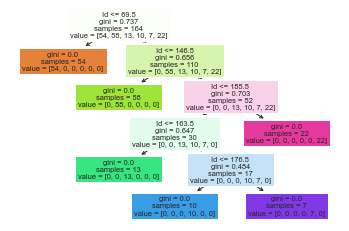

In [11]:
dfTrain, dfTest = train_test_split(df,test_size=50,random_state=1,stratify=df.Type)

#instanciation de l'arbre
arbreFirst = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)

#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.Type)

#affichage graphique de l'arbre - depuis sklearn 0.21
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)

In [12]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])

print(metrics.accuracy_score(dfTest.Type,predFirst))

0.98
